<a href="https://colab.research.google.com/github/SergeyS1954/CLT/blob/main/LW2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Лабораторная работа № 2
## Основные характеристики невосстанавливаемых элементов

## Вероятность безотказной работы для невосстанавливаемых элементов

Вероятность безотказной работы для невосстанавливаемых элементов $\mathbb{P}(t)$ --- это вероятность того, что на полуинтервале $(0,t]$ отказ системы не возникает, то есть случайная величина $\xi$, равная значению времени до отказа системы, имеет значение большее $t$.

Обозначим функцию распределения вероятностей случайной величины $\xi$ через $F_{fail}(t)$, а соответствующую плотность вероятности через $f_{fail}(t)$. Тогда    
	\begin{equation*}
		\mathbb{P}_{nofail}(t) = \mathbb{P}(\xi > t) = 1 - F_{fail}(t) = 1 - \int_{0}^{t}f_{fail}(u)du.
	\end{equation*}

Непосредственно из определения следует интуитивно очевидное свойство вероятностей указанных случайных величин: с ростом времени $t$ вероятность безотказной работы системы на полуинтервале $(0,t]$ убывает до $0$, а вероятность отказа системы на полуинтервале  возрастает до $1$.  


Математическое ожидание времени безотказной работы системы
	$$
	\mathbb{M}_{nofail} = \bar{t}_{nofail} = \int_{0}^{\infty}t f(t)dt = \int_{0}^{\infty}tdF(t) = \int_{0}^{\infty}d\mathbb{P}_{nofail}.
	$$

Из последнего соотношения следует, что математическое ожидание времени безотказной работы есть интеграл (то есть площадь под кривой) от вероятности безотказной работы при бесконечном увеличении времени.



Интенсивность отказов $\lambda(t)$ ГОСТ 27.002 определяет
как условную плотность вероятности возникновения отказа невосстанавливаемого элемента, при условии, что до момента времени $t$ отказа не произошло.

Вероятность безотказной работы системы на полуинтервале $(t,t + \Delta t]$ при условии. что до момента $t$ система работала безотказно есть:

$$
	\mathbb{P}_{nofail}(\xi > t + \Delta t | \xi > t) =\mathbb{P}_{nofail}(A | B) = \frac{\mathbb{P}_{nofail}(A  B)}{\mathbb{P}_{nofai}(B)}  
	= \frac{\int_{t + \Delta t}^{\infty}f(t)dt}{\int_{t}^{\infty}f(t)dt}.
$$
Вычисляем:
$$		\lambda(t) = \underset{\Delta t \rightarrow 0} \lim \frac{\mathbb{P}(t) - \mathbb{P}(t + \Delta t)}{\mathbb{P}(t) \Delta t} = \\
		= - \frac{1}{\mathbb{P}(t)}  \underset{\Delta t \rightarrow 0} \lim \frac{\mathbb{P}(t + \Delta t) - \mathbb{P}(t)} {\Delta t} =  
		\\
		= - \frac{1}{\mathbb{P}(t)} \frac{d}{d t}\mathbb{P}(t)  = - \frac{d}{d t}\left[\ln \mathbb{P}(t)]\right.
$$
Потенциируя, получаем:
$$
	\mathbb{P}_{nofail}(t) = \exp \left(- \int_{0}^{t}\lambda(u)du\right).
$$


Представленное уравнение для $\mathbb{P}_{nofail}(t)$ связывает вероятность безотказной работы невосстанавливаемого элемента с интенсивностью отказов.

Рассмотрим пример для  случая постоянной интенсивности отказов $\lambda = const$.

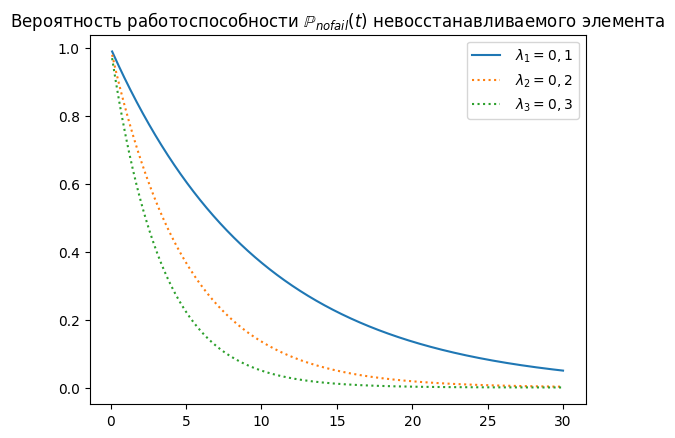

In [6]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
lam = 0.1
x = np.arange (0.1, 30.0, 0.01)
y1 = np.exp(-lam*x)
y2 = np.exp(-2*lam*x)
y3 = np.exp(-3*lam*x)
plt.plot(x,y1, label = r" $\lambda_1 = 0,1$")
plt.plot(x,y2, linestyle = ':', label = r" $\lambda_2 = 0,2$")
plt.plot(x,y3, linestyle = ':', label = r" $\lambda_3 = 0,3$")
plt.legend()
plt.title('Вероятность работоспособности ($\mathbb{P}_{nofail}(t)$) невосстанавливаемого элемента')
plt.show()

Рассмотрим пример для  случая возрастающей интенсивности отказов $\lambda(t) = \alpha t$.

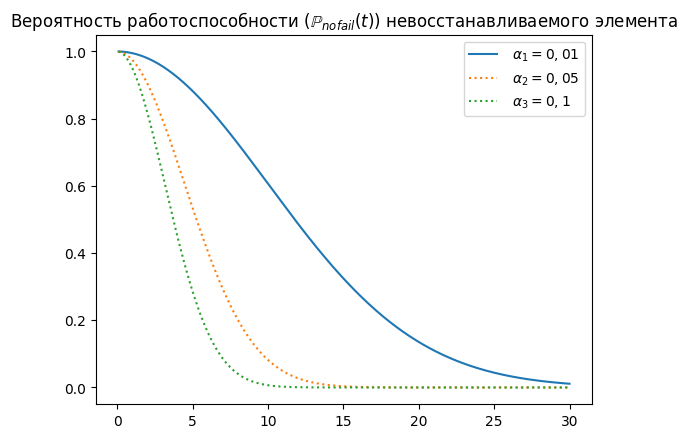

In [7]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import integrate

alpha= 0.01
def target_function_f(x):
 return alpha*x


x_min = 0.1
x_max = 30.0
x = np.arange (x_min, x_max, 0.01)
y1 =[]
y2 =[]
y3 =[]
for xx in x:
    alpha= 0.01
    intf = integrate.quad(target_function_f, 0, xx)
    y1.append(np.exp(-intf[0]))
    alpha= 0.05
    intf = integrate.quad(target_function_f, 0, xx)
    y2.append(np.exp(-intf[0]))
    alpha= 0.1
    intf = integrate.quad(target_function_f, 0, xx)
    y3.append(np.exp(-intf[0]))

plt.plot(x,y1, label = r" $\alpha_1 = 0,01$")
plt.plot(x,y2, linestyle = ':', label = r" $\alpha_2 = 0,05$")
plt.plot(x,y3, linestyle = ':', label = r" $\alpha_3 = 0,1$")
plt.legend()
plt.title('Вероятность работоспособности ($\mathbb{P}_{nofail}(t)$) невосстанавливаемого элемента')
plt.show()

# Основные характеристики надежности невосстанавливаемых элементов

Для анализа надежности невосстанавливаемых элементов используются
следующие основные характеристики:

$\lambda(t)$ --- интенсивность потока отказов;

$ \mathbb{M}_{nofail},\bar{T}$ --- средняя наработка на отказ, (среднее время работы элемента до отказа);

$\mathbb{P}_{nofail}(t)$ --- вероятность безотказной работы в течение времени $t$.

Иногда в приложениях используется также такая характеристика как частота отказов, которая задается как
$$
	\varphi(t) = \lambda(t) \mathbb{P}_{nofail}(t).
$$
Формально, частота отказов --- это плотность распределения времени безотказной работы элемена.